
# Stroop effect

## Introduction

This project investigates the Stroop effect. The Stroop effect shows that some tiny details can deteriorate the brain efficiency in dealing wiht a task. Stroop was an american professor who was the first to identify this phenomenon and put in place tests to experimentally verify this phenomenon.
One common test is to detect the color of a word. A first list of words is congruent that is to say the word itself matches the color: for instance the word yellow is yellow and the word orange is orange.

<img src="stroopa.gif" />
  
A second list of words is not congruent. This time, the word does not match the color: for instance the word yellow is orange while the word orange is yellow. This non-congruence effects significantly the performance of the test. We will check this significance in a statistical point of view by putting in place adequate tests. For more details on the stroop effect, consult the following site: [stroop site](https://faculty.washington.edu/chudler/words.html)


## Test definition (including the answers to project questions)

A statistical study has been performed based on a sampling of N=24 individual. Repeated measures were used. This means that for a same individual two measures were practicised: the first measure is based on congruent data while the second measure uses non-congruent data. This is a within subject design. Its advantage is to make easier the study of individual differences. Other advantages are in terms of the number of subjects, the cost and time efficiency.

We want to test whether congruence makes the task easier that is to say we want to test if the time is shorter when the list is congruent. We want to base that on a sufficient number of experiences and base on the mean to avoid particular individuals.

The most appropriate test is a test on the mean: we will use a Student test (t-test).

__Lets us not $\bar t_C$ the average time for congruent sets and $\bar t_{NC}$ the average time for non congruent sets in the population. These times are unknown because we do not know the overall population. However using the samples and considering the central limit theorem we can give a probability for the difference to be greater than zero (or a given value) and assess with the samples the significance of the population hypothesis i.e. its probability with respect to a given threshold of risk.__

__The null hypothesis is the no-effect hypothesis: $\mu_C = \mu_{NC}$. This means that there is no significant difference between the two population means (for congruent sets and incongruent tests).
While the alternative hypothesis can be formulated as $\mu_C < \mu_{NC} $.
We bet here that the effect is really positive and that congruent lists reduces time for naming colors: the test will then be one way.__

__Null Hypothesis: _There is no significant difference between congruent and incongruent lists in the population as far as the time to name the colour is concerned_.$$ H_0: \mu_C = \mu_{NC}$$__ 

__Alternative Hypothesis: _The time for naming colours for congruent lists is significant less than the time for naming colours in the incongruent lists within the population_. $$H_a:\mu_C < \mu_{NC}$$__ 

__The dependent variable is the time taken to spell the colors.__

__The independent variable is the property of the list: whether it is congruent or not congruent.__

__Tests are appariated hence dependent: the same individual is used for the incongruent and the congruent list. They follow the same probability law so that we can consider the mean of the difference and compare to zero and as we do not know the standard deviation, we will use a t-test (Student test) with 23 degrees of freedom (N-1) to evaluate the hypotheses.__

Let us now focus on the experiments we have got. Measurements have been perfomed on a sample of 24 individuals.
The csv file is attached below with all calculations made in Google sheets that we will reconduct in this jupyter notebook to check and give more graphical illustrations.


## Import modules

In [1]:
# All imports needed to perform the whole project:

import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import jarque_bera as jb 
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import anderson
import scipy.stats as stats
% matplotlib inline


## Reading data frames

In [2]:
samples = pd.read_csv('stroopdata.csv')
print samples.head(5)
print samples.shape
length = samples.shape[0]

   Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803
(24, 2)


## Descriptive statistics

### Show main statistics

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000
Axes(0.125,0.125;0.775x0.755)
    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


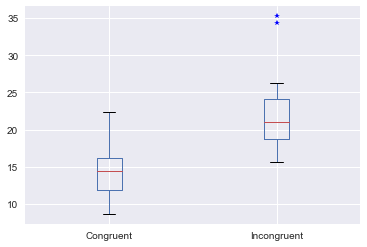

In [3]:
print samples.describe()
print samples.boxplot(sym='b*')
print samples

### Plot distributions

[[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D8085C0>


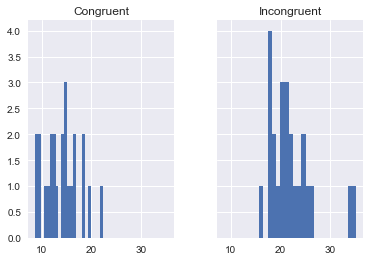

In [9]:
print samples.hist(bins=23, sharex=True, sharey=True)

Distributions are quite irregular and two outliers have been detected for the second one.
But we can notice that the means are in a consistent order and that the standard deviation is relatively small compared to the mean. The central limit theorem should then give a satisfactory gaussian approach with good test results.

However the above distributions are quite far from a normal as some statistical tests of normality can give.
For example the Agostino test will reject H0 from an alpha-level of 0.65 which is quite large.
The size of the sample can also be too small for normality tests as proved below by results obtained for a normal distribution.


Test d'Agostino : NormaltestResult(statistic=0.85207026495984284, pvalue=0.653093396926963)
Test de Shapiro-Wilk : (0.970922589302063, 0.689803421497345)
Test d'Anderson : AndersonResult(statistic=0.20967491830768026, critical_values=array([ 0.513,  0.584,  0.701,  0.817,  0.972]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Test de Jarque-Berca : (0.77351762432515658, 0.67925490319272119)
Test de Kolmogorov-Smirnov : KstestResult(statistic=1.0, pvalue=0.0)
Test d'Agostino : NormaltestResult(statistic=13.256131677149474, pvalue=0.0013227189654814793)
Test de Shapiro-Wilk : (0.85394686460495, 0.0025900385808199644)
Test d'Anderson : AndersonResult(statistic=1.0695574430921866, critical_values=array([ 0.513,  0.584,  0.701,  0.817,  0.972]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Test de Jarque-Berca : (12.088193421516269, 0.0023718223132296323)
Test de Kolmogorov-Smirnov : KstestResult(statistic=1.0, pvalue=0.0)
[[<matplotlib.axes._subplots.Axe

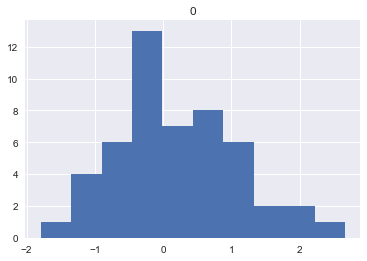

In [10]:
def normality(vec):
    """ Evaluate the normality of a sample according to various standard tests """
    print "Test d'Agostino : {}\nTest de Shapiro-Wilk : {}\nTest d'Anderson : {}\nTest de Jarque-Berca : {}\nTest de Kolmogorov-Smirnov : {}".format(
    stats.mstats.normaltest(vec),shapiro(vec, a=None, reta=False),anderson(vec, dist='norm'),jb(vec),kstest(vec,'norm'))
    
normality(samples['Congruent'])
normality(samples['Incongruent'])

pts = 50
a = np.random.normal(0, 1, size=pts)
print pd.DataFrame(a).hist()

normality(a)



## Perform test

We base on the difference of the two samples and we test against zero:

__Null Hypothesis: $$ H_0: \mu_{NC} - \mu_C=0$$__

__Alternative Hypothesis:  $$H_a: \mu_{NC} - \mu_C > 0$$__

We compute the t_value where $\sigma$ is the standard deviation of the difference $t_{NC}-t_C$ and n the size of the sample (here 24):$$tvalue=(\mu_{NC} - \mu_C)/(\sigma/\sqrt n)$$

Find attached first some calculations made in a google sheet:
<img src="Strooptest-gs.jpg" />


The csv file is accessible in the folder.



In [11]:
diff=np.array(samples['Incongruent']-samples['Congruent'])
print diff
m=diff.mean()
print m
s=diff.std(ddof=1)
n=diff.shape[0]
t_value=(m-0.)/(s/np.sqrt(n))
print m,s,n,t_value
cd = (m-0.)/s
print "Cohen distance = ", cd

[  7.199   1.95   11.65    7.057   8.134   8.64    9.88    8.407  11.361
  11.802   2.196   3.346   2.437   3.401  17.055  10.028   6.644   9.79
   6.081  21.919  10.95    3.727   2.348   5.153]
7.96479166667
7.96479166667 4.86482691036 24 8.02070694411
Cohen distance =  1.63721994912


## Draw conclusions

We then compare to t critical values as given by the t-table or a specific statistical function (dependent tests).
It is clear that H0 can be rejected with a very small level of risk.

In [12]:
Student = stats.t.ppf(0.95,df=23)
print Student
Student = stats.t.ppf(0.999,df=23)
print Student
Student = stats.t.ppf(0.9999,df=23)
print Student
Proba = stats.t.cdf(t_value,df=23)
print Proba

1.71387152775
3.4849643748
4.41520470501
0.999999979485


The probability that for the population the expectation for incongruent list is greater than for congruent list is almost one. 
The null hypothesis can be rejected with a very high level of significance.
We are almost sure that incongruence slows down the reading and interpretation of a list of words

Remark: The fact that the list is purely congruent can help making it read more quickly, because after a couple of words, the reader understands the mechanism and reads much faster.
It would be better to base on mixed tests with a varying proportion of congruent and incongruent words. Then it could be that the difference is less important.
